In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

train_accuracies = []
validation_accuracies = []

train = pd.read_csv('/home/aalmansour/source/lidc_slices/MC_dropout_files_model1/train_accuracies.csv')
val = pd.read_csv('/home/aalmansour/source/lidc_slices/MC_dropout_files_model1/val_accuracies.csv')

In [2]:
test_accuracies = []
test = pd.read_csv('/home/aalmansour/source/lidc_slices/MC_dropout_files_model1/test_accuracies.csv')
for i in range(len(test)):
    accuracy = test.loc[i, 'Accuracy']
    test_accuracies.append(accuracy)
print(test_accuracies)

[0.606638816755109]


In [3]:
for i in range(len(train)):
    accuracy = train.loc[i, 'Accuracy']
    train_accuracies.append(accuracy)

for i in range(len(val)):
    accuracy = val.loc[i, 'Accuracy']
    validation_accuracies.append(accuracy)

In [4]:
print(train_accuracies)
print(validation_accuracies)

[0.4950154858691444, 0.5467479674796748, 0.6004645760743321, 0.6611014324428959, 0.7118176538908246, 0.751984126984127, 0.7863917924893534, 0.8122338366240806, 0.8358497870692992, 0.8568041037553232, 0.8684185056136275, 0.8830332946186604, 0.8871951219512195, 0.9039876113046844, 0.9109078590785908, 0.9184572202864886, 0.9213608207510646, 0.929539295392954, 0.9318137824235384, 0.9345238095238096, 0.9407181571815718, 0.9426538908246226, 0.9464769647696476, 0.9505420054200542, 0.9522841656987998, 0.9565427797135114, 0.9550425861401473, 0.958478513356562, 0.961527293844367, 0.9581397599690282, 0.9593012001548586, 0.9591076267905536, 0.9627371273712736, 0.9645276809910956, 0.9625919473480448, 0.9671893147502904, 0.9692702284165698, 0.966753774680604, 0.9684475416182732, 0.9697057684862564, 0.9708672086720868, 0.9699477351916376, 0.9691250483933412, 0.9706736353077816, 0.9741095625241968, 0.9727061556329848, 0.9748838559814168, 0.976335656213705, 0.9727061556329848, 0.97289972899729]
[0.5155

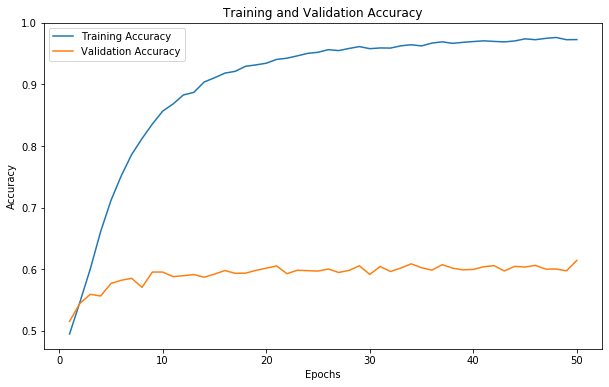

In [5]:
# Create a list of epochs for the x-axis (e.g., [1, 2, 3, 4, 5])
epochs = list(range(1, len(train_accuracies) + 1))

# Plot the training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracies,  label='Training Accuracy')
plt.plot(epochs, validation_accuracies,  label='Validation Accuracy')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Set custom x-axis ticks and labels
#plt.xticks(epochs)

# Set y-axis labels with only two decimal places
#plt.gca().yaxis.set_major_formatter('{:.2f}'.format)

# Show the plot
#plt.grid(True)
plt.show()

In [6]:
# Define a custom aggregation function to calculate mean and std for lists
def calculate_mean_std(x):
    return np.mean(x.tolist()), np.median(x.tolist()), np.std(x.tolist())

In [7]:
original = pd.read_csv('/home/aalmansour/source/lidc_slices/lidc_files/image_label_mapping.csv')
train_prediction = pd.read_csv('/home/aalmansour/source/lidc_slices/MC_dropout_files_model1/train_predictions.csv')
train_prediction = train_prediction.tail(20664).reset_index(drop=True)
# Rename the column
train_prediction.rename(columns={'Image ID': 'instance_id'}, inplace=True)

In [8]:
len(original)

29523

In [9]:
len(original['nodule_id'].unique())

1332

In [10]:
original['label'].unique()

array([5, 4, 1, 3, 2])

In [11]:
train_prediction['Predicted Label'] = train_prediction['Predicted Label'] + 1
display(train_prediction)

,instance_id,Predicted Label
0,5733,2
1,24392,4
2,6029,2
3,24404,4
4,14754,3
...,...,...
20659,4233,3
20660,15242,1
20661,27753,3
20662,9692,5


In [12]:
train_df = pd.merge(original, train_prediction, on='instance_id', how='inner')
len(train_df)

20664

In [13]:
display(train_df)

,nodule_id,instance_id,image,label,agreement,radiologist_id,Predicted Label
0,1,1,/home/aalmansour/source/lidc_slices/crops/1.dcm,5,2,1,5
1,1,2,/home/aalmansour/source/lidc_slices/crops/2.dcm,5,2,1,5
2,1,3,/home/aalmansour/source/lidc_slices/crops/3.dcm,5,2,1,5
3,1,5,/home/aalmansour/source/lidc_slices/crops/5.dcm,5,2,1,5
4,1,6,/home/aalmansour/source/lidc_slices/crops/6.dcm,5,2,1,5
...,...,...,...,...,...,...,...
20659,2690,38018,/home/aalmansour/source/lidc_slices/crops/3801...,5,1,4,5
20660,2690,38019,/home/aalmansour/source/lidc_slices/crops/3801...,5,1,4,5
20661,2690,38021,/home/aalmansour/source/lidc_slices/crops/3802...,5,1,4,5
20662,2690,38023,/home/aalmansour/source/lidc_slices/crops/3802...,5,1,4,5


In [14]:
# merged_df1['label'] at index 3
# merged_df1['agreement'] at index 4

# Define the conditions for row selection
label_condition = train_df['label'] == 5  # Replace with the desired 'label' value
agreement_condition = train_df['agreement'] == 3  # Replace with the desired 'agreement' value

# Apply the conditions to filter rows
filtered_rows = train_df[label_condition & agreement_condition]

# Access all columns and values from the filtered rows
filtered_values = filtered_rows.values

# Print the filtered values
print("Filtered Values:")
print(len(filtered_values))

Filtered Values:
198


In [15]:
# Calculate the mean predicted_label for each hum_id within the same img_id group
#mean_predicted_labels = merged_df.groupby(['nodule_id', 'radiologist_id'])['Predicted Label'].mean().reset_index()
mean_predicted_labels1 = train_df.groupby(['nodule_id', 'radiologist_id']).agg({
    'label': 'first',
    'agreement': 'first',
    'Predicted Label': 'mean'
}).reset_index()

# Print the result
#print(len(mean_predicted_labels1))

In [16]:
# Calculate accuracy based on true_label and predicted_label
correct_predictions = (mean_predicted_labels1['label'] == round(mean_predicted_labels1['Predicted Label'])).sum()
total_predictions = len(mean_predicted_labels1)

accuracy1 = correct_predictions / total_predictions

# Print the accuracy
#print("Accuracy:", accuracy1)
accuracy1

0.9634897049458714

In [17]:
group_by_nodule_id1 = train_df.groupby(['nodule_id'])
# Print the result
print(len(group_by_nodule_id1['nodule_id'].unique()))

1332


In [18]:
# group predicted labels based on nodule id

group_by_nodule_id1 = train_df.groupby(['nodule_id']).agg({
    'label': 'first',
    'agreement': 'first',
    'Predicted Label': 'mean'
}).reset_index()

# Print the result
print(len(group_by_nodule_id1))
display(group_by_nodule_id1)

1332


,nodule_id,label,agreement,Predicted Label
0,1,5,2,5.000000
1,3,5,1,5.000000
2,4,4,1,3.666667
3,5,4,0,4.000000
4,6,1,2,1.000000
...,...,...,...,...
1327,2670,4,1,4.000000
1328,2673,3,1,3.000000
1329,2677,2,1,1.944444
1330,2688,2,1,2.000000


In [19]:
# Calculate accuracy based on true_label and predicted_label
correct_predictions = (group_by_nodule_id1['label'] == round(group_by_nodule_id1['Predicted Label'])).sum()
total_predictions = len(group_by_nodule_id1)

accuracy = correct_predictions / total_predictions

# Print the accuracy
#print("Accuracy:", accuracy)
accuracy

0.9917417417417418

In [20]:
val_prediction = pd.read_csv('/home/aalmansour/source/lidc_slices/MC_dropout_files_model1/val_predictions.csv')
val_prediction = val_prediction.tail(4428).reset_index(drop=True)
# Rename the column
val_prediction.rename(columns={'Image ID': 'instance_id'}, inplace=True)
val_prediction.head()

,instance_id,Predicted Label
0,25258,0
1,7493,0
2,40165,2
3,21939,3
4,1319,2


In [21]:
val_prediction['Predicted Label'] = val_prediction['Predicted Label'] + 1
display(val_prediction)

,instance_id,Predicted Label
0,25258,1
1,7493,1
2,40165,3
3,21939,4
4,1319,3
...,...,...
4423,8620,3
4424,5825,3
4425,27555,3
4426,1983,1


In [22]:
val_df = pd.merge(original, val_prediction, on='instance_id', how='inner')
len(val_df)

4428

In [35]:
display(val_df)

,nodule_id,instance_id,image,label,agreement,radiologist_id,Predicted Label
0,1,4,/home/aalmansour/source/lidc_slices/crops/4.dcm,5,2,1,4
1,1,8,/home/aalmansour/source/lidc_slices/crops/8.dcm,5,2,1,4
2,1,24,/home/aalmansour/source/lidc_slices/crops/24.dcm,5,2,4,3
3,1,31,/home/aalmansour/source/lidc_slices/crops/31.dcm,5,2,4,5
4,3,106,/home/aalmansour/source/lidc_slices/crops/106.dcm,5,1,2,5
...,...,...,...,...,...,...,...
4423,2690,37986,/home/aalmansour/source/lidc_slices/crops/3798...,5,1,3,4
4424,2690,37987,/home/aalmansour/source/lidc_slices/crops/3798...,5,1,3,4
4425,2690,37996,/home/aalmansour/source/lidc_slices/crops/3799...,5,1,3,5
4426,2690,38015,/home/aalmansour/source/lidc_slices/crops/3801...,5,1,4,5


In [23]:
mean_predicted_labels = val_df.groupby(['nodule_id', 'radiologist_id']).agg({
    'label': 'first',
    'agreement': 'first',
    'Predicted Label': 'mean'
}).reset_index()

# Print the result
print(len(mean_predicted_labels))

2673


In [24]:
# Calculate accuracy based on true_label and predicted_label
correct_predictions = (mean_predicted_labels['label'] == round(mean_predicted_labels['Predicted Label'])).sum()
total_predictions = len(mean_predicted_labels)

accuracy2 = correct_predictions / total_predictions

# Print the accuracy
#print("Accuracy:", accuracy2)
accuracy2

0.5824915824915825

In [25]:
group_by_nodule_id2 = val_df.groupby(['nodule_id']).agg({
    'label': 'first',
    'agreement': 'first',
    'Predicted Label': 'mean'
}).reset_index()

# Print the result
print(len(group_by_nodule_id2))
display(group_by_nodule_id2)

1183


,nodule_id,label,agreement,Predicted Label
0,1,5,2,4.000000
1,3,5,1,4.142857
2,5,4,0,2.800000
3,6,1,2,1.500000
4,7,3,2,3.000000
...,...,...,...,...
1178,2670,4,1,2.250000
1179,2673,3,1,3.000000
1180,2677,2,1,2.000000
1181,2688,2,1,2.000000


In [26]:
# Calculate accuracy based on true_label and predicted_label
correct_predictions = (group_by_nodule_id2['label'] == round(group_by_nodule_id2['Predicted Label'])).sum()
total_predictions = len(group_by_nodule_id2)

accuracy = correct_predictions / total_predictions

# Print the accuracy
#print("Accuracy:", accuracy)
accuracy

0.5866441251056635

In [27]:
test_prediction = pd.read_csv('/home/aalmansour/source/lidc_slices/MC_dropout_files_model1/test_predictions.csv')
test_prediction = test_prediction.tail(4429).reset_index(drop=True)
# Rename the column
test_prediction.rename(columns={'Image ID': 'instance_id'}, inplace=True)
test_prediction.head()
len(test_prediction)

4429

In [28]:
test_prediction['Predicted Label'] = test_prediction['Predicted Label'] + 1
display(test_prediction)

,instance_id,Predicted Label
0,23494,1
1,21542,3
2,37053,3
3,11627,4
4,8124,3
...,...,...
4424,30317,3
4425,37163,4
4426,13589,3
4427,38657,3


In [29]:
test_df = pd.merge(original, test_prediction, on='instance_id', how='inner')
len(test_df)

4429

In [30]:
mean_predicted_labels = test_df.groupby(['nodule_id', 'radiologist_id']).agg({
    'label': 'first',
    'agreement': 'first',
    'Predicted Label': 'mean'
}).reset_index()

# Print the result
print(len(mean_predicted_labels))

2658


In [31]:
# Calculate accuracy based on true_label and predicted_label
correct_predictions = (mean_predicted_labels['label'] == round(mean_predicted_labels['Predicted Label'])).sum()
total_predictions = len(mean_predicted_labels)

accuracy = correct_predictions / total_predictions

# Print the accuracy
#print("Accuracy:", accuracy)
accuracy

0.5805116629044395

In [32]:
group_by_nodule_id3 = test_df.groupby(['nodule_id']).agg({
    'label': 'first',
    'agreement': 'first',
    'Predicted Label': 'mean'
}).reset_index()

# Print the result
print(len(group_by_nodule_id3))
display(group_by_nodule_id3)

1189


,nodule_id,label,agreement,Predicted Label
0,1,5,2,5.000000
1,3,5,1,5.000000
2,4,4,1,3.000000
3,5,4,0,3.500000
4,6,1,2,1.000000
...,...,...,...,...
1184,2670,4,1,3.666667
1185,2673,3,1,2.000000
1186,2677,2,1,2.600000
1187,2688,2,1,2.000000


In [33]:
# Calculate accuracy based on true_label and predicted_label
correct_predictions = (group_by_nodule_id3['label'] == round(group_by_nodule_id3['Predicted Label'])).sum()
total_predictions = len(group_by_nodule_id3)

accuracy = correct_predictions / total_predictions

# Print the accuracy
#print("Accuracy:", accuracy)
accuracy

0.5836837678721615

In [34]:
# Concatenate them vertically
stacked_df = pd.concat([train_df, val_df, test_df], axis=0)

# Reset the index if needed
stacked_df.reset_index(drop=True, inplace=True)

# Print the stacked DataFrame
print(stacked_df)

       nodule_id  instance_id  \
0              1            1   
1              1            2   
2              1            3   
3              1            5   
4              1            6   
...          ...          ...   
29516       2690        38006   
29517       2690        38007   
29518       2690        38010   
29519       2690        38011   
29520       2690        38022   

                                                   image  label  agreement  \
0        /home/aalmansour/source/lidc_slices/crops/1.dcm      5          2   
1        /home/aalmansour/source/lidc_slices/crops/2.dcm      5          2   
2        /home/aalmansour/source/lidc_slices/crops/3.dcm      5          2   
3        /home/aalmansour/source/lidc_slices/crops/5.dcm      5          2   
4        /home/aalmansour/source/lidc_slices/crops/6.dcm      5          2   
...                                                  ...    ...        ...   
29516  /home/aalmansour/source/lidc_slices/crops/3800... 

In [36]:
# Train set 
train_result_table = pd.pivot_table(train_df, values='Predicted Label', index='label', columns='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(train_result_table)

agreement,0,1,2,3
label,,,,
1,NaN,"(1.067251461988304, 1.0, 0.3802631297903855)","(1.1058673469387754, 1.0, 0.47409017349787685)","(1.0763016157989227, 1.0, 0.40030773918031926)"
2,"(2.04375, 2.0, 0.32301073898556376)","(2.0389447236180906, 2.0, 0.2939779022218726)","(2.0344827586206895, 2.0, 0.2528735632183908)","(2.125, 2.0, 0.4389855730355308)"
3,"(2.993991416309013, 3.0, 0.20914282430043632)","(2.979557879724269, 3.0, 0.2534487474174137)","(2.9841432225063937, 3.0, 0.2377520898197456)","(3.0086206896551726, 3.0, 0.16058565526032031)"
4,"(3.979256080114449, 4.0, 0.2275678872178344)","(3.970919665576154, 4.0, 0.2653321569056787)","(3.9798387096774195, 4.0, 0.2451069018617602)",NaN
5,NaN,"(4.9670624281884335, 5.0, 0.276188541793885)","(4.981077147016012, 5.0, 0.23129910599811793)","(4.98989898989899, 5.0, 0.14177443280422425)"


In [37]:
# Validation set 
val_result_table = pd.pivot_table(val_df, values='Predicted Label', index='label', columns='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(val_result_table)

agreement,0,1,2,3
label,,,,
1,NaN,"(2.338235294117647, 2.5, 1.3891416532780134)","(2.00531914893617, 1.0, 1.2182012394699344)","(1.8093385214007782, 1.0, 1.146229799432706)"
2,"(2.9393939393939394, 3.0, 0.8506465968253455)","(2.655072463768116, 3.0, 0.977950568070586)","(2.55, 3.0, 0.7621242243449118)","(2.8, 3.0, 0.39999999999999997)"
3,"(3.094488188976378, 3.0, 0.7880312442958617)","(3.033482142857143, 3.0, 0.8391877554914852)","(2.9975247524752477, 3.0, 0.7018319817274173)","(3.16, 3.0, 0.5425863986500215)"
4,"(3.9183673469387754, 4.0, 0.7781908557117396)","(3.802841918294849, 4.0, 0.8075085611023042)","(3.870967741935484, 4.0, 0.6756248633292478)",NaN
5,NaN,"(4.416666666666667, 5.0, 0.8599473566822422)","(4.456310679611651, 5.0, 0.8788419015637559)","(4.844444444444444, 5.0, 0.46930471293206394)"


In [38]:
# Test set 
test_result_table = pd.pivot_table(train_df, values='Predicted Label', index='label', columns='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(test_result_table)

agreement,0,1,2,3
label,,,,
1,NaN,"(1.067251461988304, 1.0, 0.3802631297903855)","(1.1058673469387754, 1.0, 0.47409017349787685)","(1.0763016157989227, 1.0, 0.40030773918031926)"
2,"(2.04375, 2.0, 0.32301073898556376)","(2.0389447236180906, 2.0, 0.2939779022218726)","(2.0344827586206895, 2.0, 0.2528735632183908)","(2.125, 2.0, 0.4389855730355308)"
3,"(2.993991416309013, 3.0, 0.20914282430043632)","(2.979557879724269, 3.0, 0.2534487474174137)","(2.9841432225063937, 3.0, 0.2377520898197456)","(3.0086206896551726, 3.0, 0.16058565526032031)"
4,"(3.979256080114449, 4.0, 0.2275678872178344)","(3.970919665576154, 4.0, 0.2653321569056787)","(3.9798387096774195, 4.0, 0.2451069018617602)",NaN
5,NaN,"(4.9670624281884335, 5.0, 0.276188541793885)","(4.981077147016012, 5.0, 0.23129910599811793)","(4.98989898989899, 5.0, 0.14177443280422425)"


In [39]:
# Train set 
all_result_table = pd.pivot_table(stacked_df, values='Predicted Label', index='label', columns='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(all_result_table)

agreement,0,1,2,3
label,,,,
1,NaN,"(1.462809917355372, 1.0, 1.000341448434166)","(1.3991341991341992, 1.0, 0.8890868578856912)","(1.3155917345021917, 1.0, 0.8073479725532127)"
2,"(2.3053097345132745, 2.0, 0.7162266793948133)","(2.2255375164545854, 2.0, 0.6367678767737048)","(2.1964285714285716, 2.0, 0.5800136346039898)","(2.41025641025641, 2.0, 0.6291202126351435)"
3,"(3.035906642728905, 3.0, 0.5060055855077987)","(3.0011670556852286, 3.0, 0.49757528625344455)","(2.990990990990991, 3.0, 0.4264983232542158)","(3.0529595015576323, 3.0, 0.33535069509776666)"
4,"(3.95678391959799, 4.0, 0.47673692854435257)","(3.917973772177938, 4.0, 0.49394212272585303)","(3.929098966026588, 4.0, 0.4621521013687179)",NaN
5,NaN,"(4.797404661016949, 5.0, 0.5983767248928799)","(4.830714647744552, 5.0, 0.5666248372663666)","(4.92831541218638, 5.0, 0.31998156445398773)"
